In [1]:
import numpy as np
import matplotlib.pyplot as plt
import datasets
import matplotlib.transforms as mtransforms
import evaluate
import pandas as pd
from scipy.stats import wasserstein_distance as wass
import pickle as pkl
from evaluate import load

/home/haskari/miniconda3/envs/acl/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


[2023-12-12 21:40:24,335] [INFO] [real_accelerator.py:158:get_accelerator] Setting ds_accelerator to cuda (auto detect)


In [2]:
def get_bad_indice(name,model):
    if model!='gpt3.5-T':
        if name=='cnn':
            with open('../{}/data_paraphrase/cnn.pkl'.format(model), 'rb') as f:
                paraphrased_summaries=pkl.load(f)
        elif name=='xsum':
            with open('../{}/data_paraphrase/xsum_capped_random.pkl'.format(model), 'rb') as f:
                paraphrased_summaries=pkl.load(f)
            
        elif name=='news':
            with open('../{}/data_paraphrase/news_capped_random.pkl'.format(model), 'rb') as f:
                paraphrased_summaries=pkl.load(f)
        
        else:
            with open('../{}/data_paraphrase/reddit_capped_random.pkl'.format(model), 'rb') as f:
                paraphrased_summaries=pkl.load(f)
    else:
        print('here')
        if name=='cnn':
            with open('../{}/data_paraphrase/cnn.pkl'.format(model), 'rb') as f:
                paraphrased_summaries=pkl.load(f)
        elif name=='xsum':
            with open('../{}/data_paraphrase/xsum.pkl'.format(model), 'rb') as f:
                paraphrased_summaries=pkl.load(f)
            
        elif name=='news':
            with open('../{}/data_paraphrase/news.pkl'.format(model), 'rb') as f:
                paraphrased_summaries=pkl.load(f)
        
        else:
            with open('../{}/data_paraphrase/reddit.pkl'.format(model), 'rb') as f:
                paraphrased_summaries=pkl.load(f)
        
    bad_index=[]
    for idx,sum in enumerate(paraphrased_summaries):
        if sum == []:
            bad_index.append(idx)
    return bad_index

In [3]:
#LOADING MODELS

In [4]:
#paraphrased llama
p_data_llama_cnn = datasets.load_from_disk("../llama2/saved_models/LlaMa2-cnn-capped_random-rouge/")

p_data_llama_xsum = datasets.load_from_disk("../llama2/saved_models/LlaMa2-xsum-capped_random-rouge/")

p_data_llama_news = datasets.load_from_disk("../llama2/saved_models/LlaMa2-news-capped_random-rouge/")

p_data_llama_reddit = datasets.load_from_disk("../llama2/saved_models/LlaMa2-reddit-capped_random-rouge/")

#original llama


data_llama_cnn = datasets.load_from_disk("../../position_bias/llama/saved_models/LlaMa2-cnn/")

bad_index=get_bad_indice('cnn','llama2')
data_llama_cnn=data_llama_cnn.select(i for i in range(len(data_llama_cnn)) 
                 if i not in set(bad_index))



data_llama_xsum = datasets.load_from_disk("../../position_bias/llama/saved_models/LlaMa2-xsum-capped_random/")

bad_index=get_bad_indice('xsum','llama2')
data_llama_xsum=data_llama_xsum.select(i for i in range(len(data_llama_xsum)) 
                 if i not in set(bad_index))


data_llama_news = datasets.load_from_disk("../../position_bias/llama/saved_models/LlaMa2-news-capped_random/")

bad_index=get_bad_indice('news','llama2')
data_llama_news=data_llama_news.select(i for i in range(len(data_llama_news)) 
                 if i not in set(bad_index))


data_llama_reddit = datasets.load_from_disk("../../position_bias/llama/saved_models/LlaMa2-reddit-capped_random/")

bad_index=get_bad_indice('reddit','llama2')
data_llama_reddit=data_llama_reddit.select(i for i in range(len(data_llama_reddit)) 
                 if i not in set(bad_index))


#paraphrased gpt

p_data_gpt_cnn = datasets.load_from_disk("../gpt3.5-T/saved_models/GPT-cnn/")

p_data_gpt_xsum = datasets.load_from_disk("../gpt3.5-T/saved_models/GPT-xsum/")

p_data_gpt_news = datasets.load_from_disk("../gpt3.5-T/saved_models/GPT-news/")

p_data_gpt_reddit = datasets.load_from_disk("../gpt3.5-T/saved_models/GPT-reddit/")


#original GPT

data_gpt_cnn = datasets.load_from_disk("../../position_bias/chatGPT/saved_models/GPT-3.5-Turbo-cnn/")

bad_index=get_bad_indice('cnn','gpt3.5-T')
data_gpt_cnn=data_gpt_cnn.select(i for i in range(len(data_gpt_cnn)) 
                 if i not in set(bad_index))



data_gpt_xsum = datasets.load_from_disk("../../position_bias/chatGPT/saved_models/GPT-3.5-Turbo-xsum-capped_random/")

bad_index=get_bad_indice('xsum','gpt3.5-T')
data_gpt_xsum=data_gpt_xsum.select(i for i in range(len(data_gpt_xsum)) 
                 if i not in set(bad_index))


data_gpt_news = datasets.load_from_disk("../../position_bias/chatGPT/saved_models/GPT-3.5-Turbo-news-capped_random/")

bad_index=get_bad_indice('news','gpt3.5-T')
data_gpt_news=data_gpt_news.select(i for i in range(len(data_gpt_news)) 
                 if i not in set(bad_index))


data_gpt_reddit = datasets.load_from_disk("../../position_bias/chatGPT/saved_models/GPT-3.5-Turbo-reddit/")

bad_index=get_bad_indice('reddit','gpt3.5-T')
data_gpt_reddit=data_gpt_reddit.select(i for i in range(len(data_gpt_reddit)) 
                 if i not in set(bad_index))


#paraphrased dolly

p_data_dolly_cnn = datasets.load_from_disk("../dolly-v2/saved_models/dolly-cnn/")

p_data_dolly_xsum = datasets.load_from_disk("../dolly-v2/saved_models/dolly-xsum/")

p_data_dolly_news = datasets.load_from_disk("../dolly-v2/saved_models/dolly-news/")

p_data_dolly_reddit = datasets.load_from_disk("../dolly-v2/saved_models/dolly-reddit/")


#original dolly

data_dolly_cnn = datasets.load_from_disk("../../position_bias/dolly2/saved_models/Dollyv2-cnn/")

bad_index=get_bad_indice('cnn','dolly-v2')
data_dolly_cnn=data_dolly_cnn.select(i for i in range(len(data_dolly_cnn)) 
                 if i not in set(bad_index))



data_dolly_xsum = datasets.load_from_disk("../../position_bias/dolly2/saved_models/Dollyv2-xsum_capped_random/")

bad_index=get_bad_indice('xsum','dolly-v2')
data_dolly_xsum=data_dolly_xsum.select(i for i in range(len(data_dolly_xsum)) 
                 if i not in set(bad_index))


data_dolly_news = datasets.load_from_disk("../../position_bias/dolly2/saved_models/Dollyv2-news_capped_random/")

bad_index=get_bad_indice('news','dolly-v2')
data_dolly_news=data_dolly_news.select(i for i in range(len(data_dolly_news)) 
                 if i not in set(bad_index))


data_dolly_reddit = datasets.load_from_disk("../../position_bias/dolly2/saved_models/Dollyv2-reddit_capped_random/")

bad_index=get_bad_indice('reddit','dolly-v2')
data_dolly_reddit=data_dolly_reddit.select(i for i in range(len(data_dolly_reddit)) 
                 if i not in set(bad_index))


#paraphrased mistral-7b

p_data_mistral_cnn = datasets.load_from_disk("../mistral-7b/saved_models/paraphrase/Mistral-cnn/")

p_data_mistral_xsum = datasets.load_from_disk("../mistral-7b/saved_models/paraphrase/Mistral-xsum/")

p_data_mistral_news = datasets.load_from_disk("../mistral-7b/saved_models/paraphrase/Mistral-news/")

p_data_mistral_reddit = datasets.load_from_disk("../mistral-7b/saved_models/paraphrase/Mistral-reddit/")


#original mistral-7b

data_mistral_cnn = datasets.load_from_disk("../mistral-7b/saved_models/original/Mistral-cnn/")

bad_index=get_bad_indice('cnn','mistral-7b')
data_mistral_cnn=data_mistral_cnn.select(i for i in range(len(data_mistral_cnn)) 
                 if i not in set(bad_index))


data_mistral_xsum = datasets.load_from_disk("../mistral-7b/saved_models/original/Mistral-xsum/")

bad_index=get_bad_indice('xsum','mistral-7b')
data_mistral_xsum=data_mistral_xsum.select(i for i in range(len(data_mistral_xsum)) 
                 if i not in set(bad_index))

data_mistral_news = datasets.load_from_disk("../mistral-7b/saved_models/original/Mistral-news/")

bad_index=get_bad_indice('news','mistral-7b')
data_mistral_news=data_mistral_news.select(i for i in range(len(data_mistral_news)) 
                 if i not in set(bad_index))


data_mistral_reddit = datasets.load_from_disk("../mistral-7b/saved_models/original/Mistral-reddit/")

bad_index=get_bad_indice('reddit','mistral-7b')
data_mistral_reddit=data_mistral_reddit.select(i for i in range(len(data_mistral_reddit)) 
                 if i not in set(bad_index))



Parameter 'indices'=<generator object <genexpr> at 0x7fa5eb1e3d80> of the transform datasets.arrow_dataset.Dataset.select couldn't be hashed properly, a random hash was used instead. Make sure your transforms and parameters are serializable with pickle or dill for the dataset fingerprinting and caching to work. If you reuse this transform, the caching mechanism will consider it to be different from the previous calls and recompute everything. This warning is only showed once. Subsequent hashing failures won't be showed.


here
here
here
here


In [5]:
#Loading CSV's

#paraphrased llama csv
p_data_llama_cnn_csv = pd.read_csv("../llama2/results/LlaMa2-cnn-capped_random-rouge.csv")

p_data_llama_xsum_csv = pd.read_csv("../llama2/results/LlaMa2-xsum-capped_random-rouge.csv")

p_data_llama_news_csv = pd.read_csv("../llama2/results/LlaMa2-news-capped_random-rouge.csv")

p_data_llama_reddit_csv = pd.read_csv("../llama2/results/LlaMa2-reddit-capped_random-rouge.csv")

#original llama csv
data_llama_cnn_csv = pd.read_csv("../../position_bias/llama/results/LlaMa2-cnn.csv")

data_llama_xsum_csv = pd.read_csv("../../position_bias/llama/results/LlaMa2-xsum-capped_random.csv")

data_llama_news_csv = pd.read_csv("../../position_bias/llama/results/LlaMa2-news-capped_random.csv")

data_llama_reddit_csv = pd.read_csv("../../position_bias/llama/results/LlaMa2-reddit-capped_random.csv")

#paraphrased gpt csv
p_data_gpt_cnn_csv = pd.read_csv("../gpt3.5-T/results/GPT-cnn.csv")

p_data_gpt_xsum_csv = pd.read_csv("../gpt3.5-T/results/GPT-xsum.csv")

p_data_gpt_news_csv = pd.read_csv("../gpt3.5-T/results/GPT-news.csv")

p_data_gpt_reddit_csv = pd.read_csv("../gpt3.5-T/results/GPT-reddit.csv")

#original gpt csv
data_gpt_cnn_csv = pd.read_csv("../../position_bias/chatGPT/results/GPT-3.5-Turbo-cnn.csv")

data_gpt_xsum_csv = pd.read_csv("../../position_bias/chatGPT/results/GPT-3.5-Turbo-xsum-capped_random.csv")

data_gpt_news_csv = pd.read_csv("../../position_bias/chatGPT/results/GPT-3.5-Turbo-news-capped_random.csv")

data_gpt_reddit_csv = pd.read_csv("../../position_bias/chatGPT/results/GPT-3.5-Turbo-reddit.csv")

#paraphrased dolly csv
p_data_dolly_cnn_csv = pd.read_csv("../dolly-v2/results/dolly-cnn.csv")

p_data_dolly_xsum_csv = pd.read_csv("../dolly-v2/results/dolly-xsum.csv")

p_data_dolly_news_csv = pd.read_csv("../dolly-v2/results/dolly-news.csv")

p_data_dolly_reddit_csv = pd.read_csv("../dolly-v2/results/dolly-reddit.csv")

#original dolly csv
data_dolly_cnn_csv = pd.read_csv("../../position_bias/dolly2/results/Dollyv2-cnn.csv")

data_dolly_xsum_csv = pd.read_csv("../../position_bias/dolly2/results/Dollyv2-xsum_capped_random.csv")

data_dolly_news_csv = pd.read_csv("../../position_bias/dolly2/results/Dollyv2-news_capped_random.csv")

data_dolly_reddit_csv = pd.read_csv("../../position_bias/dolly2/results/Dollyv2-reddit_capped_random.csv")


#paraphrased mistral csv
p_data_mistral_cnn_csv = pd.read_csv("../mistral-7b/results/paraphrase/Mistral-cnn.csv")

p_data_mistral_xsum_csv = pd.read_csv("../mistral-7b/results/paraphrase/Mistral-xsum.csv")

p_data_mistral_news_csv = pd.read_csv("../mistral-7b/results/paraphrase/Mistral-news.csv")

p_data_mistral_reddit_csv = pd.read_csv("../mistral-7b/results/paraphrase/Mistral-reddit.csv")

#original mistral csv
data_mistral_cnn_csv = pd.read_csv("../mistral-7b/results/original/Mistral-cnn.csv")

data_mistral_xsum_csv = pd.read_csv("../mistral-7b/results/original/Mistral-xsum.csv")

data_mistral_news_csv = pd.read_csv("../mistral-7b/results/original/Mistral-news.csv")

data_mistral_reddit_csv = pd.read_csv("../mistral-7b/results/original/Mistral-reddit.csv")


In [7]:
def get_lines_modified(data):
    cumm_list1 = [0]*10
    #cumm_list2 = [0]*10

    for ind, da in enumerate(data):
        y1 = da['mapping_gen']
    #     print(y)
        cumm_list1 = [a+b for a,b in zip(cumm_list1, y1)]
    #     y2 = da['mapping']
    # #     print(y)
    #     cumm_list2 = [a*b for a,b in zip(cumm_list2, y2)]
    
    return cumm_list1

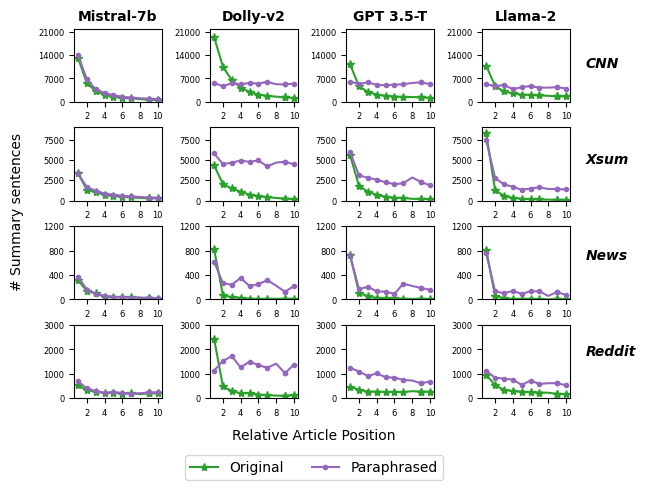

In [10]:
markers=[0,1,2,3,4,5,6,8,8,9]
x = [j for j in range(1,11)]
even_xticks = np.arange(2, 11, 2)

cnn_ticks=[0,7000,14000,21000]
xsum_ticks=[0,2500,5000,7500]
news_ticks=[0,400,800,1200]
reddit_ticks=[0,1000,2000,3000]


fig, axs = plt.subplots(4, 4) #,sharey=True)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')

cumm_list1=get_lines_modified(data_mistral_cnn)
cumm_list2=get_lines_modified(p_data_mistral_cnn)
axs[0, 0].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[0, 0].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
axs[0, 0].set_title('Mistral-7b',fontsize = 10,weight='bold')
axs[0, 0].set_xticks(even_xticks)
axs[0, 0].set_xticklabels(even_xticks, fontsize=6)
axs[0, 0].set_yticks(cnn_ticks)
axs[0, 0].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 0].set_ylim([0, 22000])
# axs[0, 0].annotate("Test", xy=(-0.55, 0.55), xycoords=axs[0, 0].transAxes, fontsize=10)





cumm_list1=get_lines_modified(data_mistral_xsum)
cumm_list2=get_lines_modified(p_data_mistral_xsum)
axs[1, 0].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[1, 0].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[1, 0].set_title('XSUM-BART',fontsize = 10)
axs[1, 0].set_xticks(even_xticks)
axs[1, 0].set_xticklabels(even_xticks, fontsize=6)
axs[1, 0].set_yticks(xsum_ticks)
axs[1, 0].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 0].set_ylim([0, 9000])


cumm_list1=get_lines_modified(data_mistral_news)
cumm_list2=get_lines_modified(p_data_mistral_news)
axs[2, 0].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[2, 0].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[2, 0].set_title('NEWS-BART',fontsize = 10)
axs[2, 0].set_xticks(even_xticks)
axs[2, 0].set_xticklabels(even_xticks, fontsize=6)
axs[2, 0].set_yticks(news_ticks)
axs[2, 0].set_yticklabels(news_ticks, fontsize=6)
axs[2, 0].set_ylim([0, 1200])


cumm_list1=get_lines_modified(data_mistral_reddit)
cumm_list2=get_lines_modified(p_data_mistral_reddit)
axs[3, 0].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[3, 0].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[3, 0].set_title('REDDIT-BART',fontsize = 10)
axs[3, 0].set_xticks(even_xticks)
axs[3, 0].set_xticklabels(even_xticks, fontsize=6)
axs[3, 0].set_xticklabels(even_xticks, fontsize=6)
axs[3, 0].set_yticks(reddit_ticks)
axs[3, 0].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 0].set_ylim([0, 3000])




#DOLLY


cumm_list1=get_lines_modified(data_dolly_cnn)
cumm_list2=get_lines_modified(p_data_dolly_cnn)
axs[0, 1].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[0, 1].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
axs[0, 1].set_title('Dolly-v2',fontsize = 10,weight='bold')
axs[0, 1].set_xticks(even_xticks)
axs[0, 1].set_xticklabels(even_xticks, fontsize=6)
axs[0, 1].set_yticks(cnn_ticks)
axs[0, 1].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 1].set_ylim([0, 22000])


cumm_list1=get_lines_modified(data_dolly_xsum)
cumm_list2=get_lines_modified(p_data_dolly_xsum)
axs[1, 1].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[1, 1].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[1, 2].set_title('XSUM-DOLLY',fontsize = 10)
axs[1, 1].set_xticks(even_xticks)
axs[1, 1].set_xticklabels(even_xticks, fontsize=6)
axs[1, 1].set_yticks(xsum_ticks)
axs[1, 1].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 1].set_ylim([0, 9000])


cumm_list1=get_lines_modified(data_dolly_news)
cumm_list2=get_lines_modified(p_data_dolly_news)
axs[2, 1].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[2, 1].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[2,2].set_title('NEWS-DOLLY',fontsize = 10)
axs[2, 1].set_xticks(even_xticks)
axs[2, 1].set_xticklabels(even_xticks, fontsize=6)
axs[2, 1].set_yticks(news_ticks)
axs[2, 1].set_yticklabels(news_ticks, fontsize=6)
axs[2, 1].set_ylim([0, 1200])


cumm_list1=get_lines_modified(data_dolly_reddit)
cumm_list2=get_lines_modified(p_data_dolly_reddit)
axs[3, 1].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[3, 1].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[3, 2].set_title('REDDIT-DOLLY',fontsize = 10)
axs[3, 1].set_xticks(even_xticks)
axs[3, 1].set_xticklabels(even_xticks, fontsize=6)
axs[3, 1].set_yticks(reddit_ticks)
axs[3, 1].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 1].set_ylim([0, 3000])


#GPT

cumm_list1=get_lines_modified(data_gpt_cnn)
cumm_list2=get_lines_modified(p_data_gpt_cnn)
axs[0, 2].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[0, 2].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
axs[0, 2].set_title('GPT 3.5-T',fontsize = 10,weight='bold')
axs[0, 2].set_xticks(even_xticks)
axs[0, 2].set_xticklabels(even_xticks, fontsize=6)
axs[0, 2].set_yticks(cnn_ticks)
axs[0, 2].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 2].set_ylim([0, 22000])


cumm_list1=get_lines_modified(data_gpt_xsum)
cumm_list2=get_lines_modified(p_data_gpt_xsum)
axs[1, 2].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[1, 2].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[1, 3].set_title('XSUM-GPT3.5',fontsize = 10)
axs[1, 2].set_xticks(even_xticks)
axs[1, 2].set_xticklabels(even_xticks, fontsize=6)
axs[1, 2].set_yticks(xsum_ticks)
axs[1, 2].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 2].set_ylim([0, 9000])


cumm_list1=get_lines_modified(data_gpt_news)
cumm_list2=get_lines_modified(p_data_gpt_news)
axs[2, 2].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[2, 2].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[2, 3].set_title('NEWS-GPT3.5',fontsize = 10)
axs[2, 2].set_xticks(even_xticks)
axs[2, 2].set_xticklabels(even_xticks, fontsize=6)
axs[2, 2].set_yticks(news_ticks)
axs[2, 2].set_yticklabels(news_ticks, fontsize=6)
axs[2, 2].set_ylim([0, 1200])

cumm_list1=get_lines_modified(data_gpt_reddit)
cumm_list2=get_lines_modified(p_data_gpt_reddit)
axs[3, 2].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[3, 2].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[3, 3].set_title('REDDIT-GPT3.5',fontsize = 10)
axs[3, 2].set_xticks(even_xticks)
axs[3, 2].set_xticklabels(even_xticks, fontsize=6)
axs[3, 2].set_xticklabels(even_xticks, fontsize=6)
axs[3, 2].set_yticks(reddit_ticks)
axs[3, 2].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 2].set_ylim([0, 3000])


#LlaMa

cumm_list1=get_lines_modified(data_llama_cnn)
cumm_list2=get_lines_modified(p_data_llama_cnn)
axs[0, 3].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[0, 3].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
axs[0, 3].set_title('Llama-2',fontsize = 10,weight='bold')
axs[0, 3].set_xticks(even_xticks)
axs[0, 3].set_xticklabels(even_xticks, fontsize=6)
axs[0, 3].set_yticks(cnn_ticks)
axs[0, 3].set_yticklabels(cnn_ticks, fontsize=6)
axs[0, 3].set_ylim([0, 22000])


cumm_list1=get_lines_modified(data_llama_xsum)
cumm_list2=get_lines_modified(p_data_llama_xsum)
axs[1, 3].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[1, 3].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[1, 4].set_title('XSUM-LlaMa',fontsize = 10)
axs[1, 3].set_xticks(even_xticks)
axs[1, 3].set_xticklabels(even_xticks, fontsize=6)
axs[1, 3].set_yticks(xsum_ticks)
axs[1, 3].set_yticklabels(xsum_ticks, fontsize=6)
axs[1, 3].set_ylim([0, 9000])


cumm_list1=get_lines_modified(data_llama_news)
cumm_list2=get_lines_modified(p_data_llama_news)
axs[2, 3].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[2, 3].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[2, 4].set_title('NEWS-LlaMa',fontsize = 10)
axs[2, 3].set_xticks(even_xticks)
axs[2, 3].set_xticklabels(even_xticks, fontsize=6)
axs[2, 3].set_yticks(news_ticks)
axs[2, 3].set_yticklabels(news_ticks, fontsize=6)
axs[2, 3].set_ylim([0, 1200])


cumm_list1=get_lines_modified(data_llama_reddit)
cumm_list2=get_lines_modified(p_data_llama_reddit)
axs[3, 3].plot(x, cumm_list1,color='tab:green', marker='*', label="Original", markevery=markers)
axs[3, 3].plot(x, cumm_list2,color='tab:purple', marker='.', label="Paraphrased", markevery=markers)
#axs[3,4].set_title('REDDIT-LlaMa',fontsize = 10)
axs[3, 3].set_xticks(even_xticks)
axs[3, 3].set_xticklabels(even_xticks, fontsize=6)
axs[3, 3].set_yticks(reddit_ticks)
axs[3, 3].set_yticklabels(reddit_ticks, fontsize=6)
axs[3, 3].set_ylim([0, 3000])
handles, labels = axs[3, 3].get_legend_handles_labels()

# for ax in axs.flat:
#     ax.set(xlabel='Segment', ylabel='# of sentences')

# fig.supxlabel('Segment #')
# fig.supylabel('# of sentences')

fig.text(0.5, 0.025, 'Relative Article Position', ha='center')
fig.text(0.025, 0.5, '# Summary sentences', va='center', rotation='vertical')
    
# for ax in axs.flat:
#     ax.label_outer()

plt.gcf().text(0.925, 0.8, "CNN", fontsize=10,style='italic',weight='bold')
plt.gcf().text(0.925, 0.6, "Xsum", fontsize=10,style='italic',weight='bold')
plt.gcf().text(0.925, 0.4, "News", fontsize=10,style='italic',weight='bold')
plt.gcf().text(0.925, 0.2, "Reddit", fontsize=10,style='italic',weight='bold')


fig.legend(handles, labels,ncol=2, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
#fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)
fig.subplots_adjust(hspace=0.35, wspace=0.55)

plt.savefig('../figures/final/results_with_all_axis_random.png',bbox_inches='tight',dpi=400)
plt.show()

In [ ]:
#paper table

In [6]:
def get_rouge1(data):

    highlights = []
    model_s = []


    for j in data['highlights']:
        highlights.append(' '.join(j))

    for k in data['model_summaries']:
        model_s.append(' '.join(k))


    rouge = evaluate.load('rouge')

    print("==> Comparing generated summaries with gold summaries")
    results = rouge.compute(predictions=model_s, references=highlights)
    
    return results

In [8]:
def get_change(new,old):
    return ((new-old)/old)*100

In [16]:
#llama cnn

rouge1_new=get_rouge1(p_data_llama_cnn)
rouge1_old=get_rouge1(data_llama_cnn)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_llama_cnn_csv['bertscore']
Bert_old=data_llama_cnn_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)

#llama xsum

rouge1_new=get_rouge1(p_data_llama_xsum)
rouge1_old=get_rouge1(data_llama_xsum)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_llama_xsum_csv['bertscore']
Bert_old=data_llama_xsum_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)

#llama news

rouge1_new=get_rouge1(p_data_llama_news)
rouge1_old=get_rouge1(data_llama_news)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_llama_news_csv['bertscore']
Bert_old=data_llama_news_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)

#llama reddit

rouge1_new=get_rouge1(p_data_llama_reddit)
rouge1_old=get_rouge1(data_llama_reddit)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_llama_reddit_csv['bertscore']
Bert_old=data_llama_reddit_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)


==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-7.354153433465256
rouge2
-21.20192223746247
rougeL
-9.430919667963659
bertscore
0   -0.311275
Name: bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-2.8367596865782283
rouge2
-8.077116143583671
rougeL
-3.7644684617159543
bertscore
0   -0.091733
Name: bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-10.901343543684856
rouge2
-28.42904965033387
rougeL
-13.154978521630731
bertscore
0   -0.080027
Name: bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-3.1584146072008337
rouge2
-13.095387087673721
rougeL
-3.5294088379391546
bertscore
0   -0.069889
Name: bertscore, dtype: float64


In [17]:
#llama cnn

rouge1_new=get_rouge1(p_data_gpt_cnn)
rouge1_old=get_rouge1(data_gpt_cnn)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_gpt_cnn_csv['bertscore']
Bert_old=data_gpt_cnn_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)

#llama xsum

rouge1_new=get_rouge1(p_data_gpt_xsum)
rouge1_old=get_rouge1(data_gpt_xsum)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_gpt_xsum_csv['bertscore']
Bert_old=data_gpt_xsum_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)

#llama news

rouge1_new=get_rouge1(p_data_gpt_news)
rouge1_old=get_rouge1(data_gpt_news)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_gpt_news_csv['bertscore']
Bert_old=data_gpt_news_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)

#llama reddit

rouge1_new=get_rouge1(p_data_gpt_reddit)
rouge1_old=get_rouge1(data_gpt_reddit)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_gpt_reddit_csv['bertscore']
Bert_old=data_gpt_reddit_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)


==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-8.750206225411139
rouge2
-23.734104085248024
rougeL
-13.541618337396635
bertscore
0   -0.689259
Name: bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
16.19405972889318
rouge2
12.991741885570764
rougeL
11.410218485566476
bertscore
0    0.320733
Name: bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-15.412140744745113
rouge2
-36.96499551828069
rougeL
-17.005287710573818
bertscore
0   -0.70659
Name: bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-6.600645632080601
rouge2
-24.12608900869483
rougeL
-7.645631902490119
bertscore
0   -0.749625
Name: bertscore, dtype: float64


In [18]:
#llama cnn

rouge1_new=get_rouge1(p_data_dolly_cnn)
rouge1_old=get_rouge1(data_dolly_cnn)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_dolly_cnn_csv['bertscore']
Bert_old=data_dolly_cnn_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)

#llama xsum

rouge1_new=get_rouge1(p_data_dolly_xsum)
rouge1_old=get_rouge1(data_dolly_xsum)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_dolly_xsum_csv['bertscore']
Bert_old=data_dolly_xsum_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)

#llama news

rouge1_new=get_rouge1(p_data_dolly_news)
rouge1_old=get_rouge1(data_dolly_news)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_dolly_news_csv['bertscore']
Bert_old=data_dolly_news_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)

#llama reddit

rouge1_new=get_rouge1(p_data_dolly_reddit)
rouge1_old=get_rouge1(data_dolly_reddit)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_dolly_reddit_csv['bertscore']
Bert_old=data_dolly_reddit_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)


==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-13.765413676489546
rouge2
-31.655515294360274
rougeL
-15.699827546480854
bertscore
0   -5.754151
Name: bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
0.6797345808017847
rouge2
-3.6070353451900004
rougeL
1.4647918182491717
bertscore
0   -0.524781
Name: bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-39.60454404456447
rouge2
-50.300335212869854
rougeL
-41.785405278230286
bertscore
0   -7.082956
Name: bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-21.847708990150682
rouge2
-13.204542935663326
rougeL
-27.63722795141415
bertscore
0   -18.83939
Name: bertscore, dtype: float64


In [19]:
#llama cnn

rouge1_new=get_rouge1(p_data_mistral_cnn)
rouge1_old=get_rouge1(data_mistral_cnn)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_mistral_cnn_csv['bertscore']
Bert_old=data_mistral_cnn_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)

#llama xsum

rouge1_new=get_rouge1(p_data_mistral_xsum)
rouge1_old=get_rouge1(data_mistral_xsum)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_mistral_xsum_csv['bertscore']
Bert_old=data_mistral_xsum_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)

#llama news

rouge1_new=get_rouge1(p_data_mistral_news)
rouge1_old=get_rouge1(data_mistral_news)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_mistral_news_csv['bertscore']
Bert_old=data_mistral_news_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)

#llama reddit

rouge1_new=get_rouge1(p_data_mistral_reddit)
rouge1_old=get_rouge1(data_mistral_reddit)
rouge1_cnn_change=get_change(rouge1_new['rouge1'],rouge1_old['rouge1'])
print('rouge1')
print(rouge1_cnn_change)

rouge2_cnn_change=get_change(rouge1_new['rouge2'],rouge1_old['rouge2'])
print('rouge2')
print(rouge2_cnn_change)

rougeL_cnn_change=get_change(rouge1_new['rougeL'],rouge1_old['rougeL'])
print('rougeL')
print(rougeL_cnn_change)

Bert_new=p_data_mistral_reddit_csv['bertscore']
Bert_old=data_mistral_reddit_csv['bertscore']
bertscore=get_change(Bert_new,Bert_old)
print('bertscore')
print(bertscore)


==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-6.814256536831907
rouge2
-27.721618275231652
rougeL
-11.991514234280183
bertscore
0   -0.522163
Name: bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-3.679656930914833
rouge2
-13.907454070946754
rougeL
-3.6493591614431975
bertscore
0    0.046981
Name: bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
-7.457452663331086
rouge2
-19.426495967529288
rougeL
-10.645562716906626
bertscore
0    0.52755
Name: bertscore, dtype: float64
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
rouge1
2.974220302363776
rouge2
-13.885880697664371
rougeL
1.6966293103989143
bertscore
0    2.104754
Name: bertscore, dtype: float64


In [ ]:
#Paper bar charts

==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summaries with gold summaries
==> Comparing generated summ

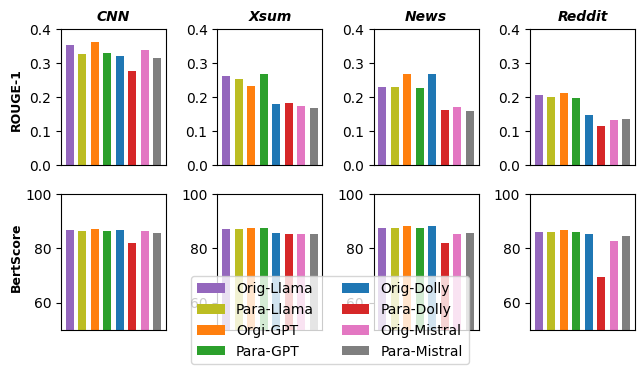

In [16]:
#Bar Plot Code
fig, axs = plt.subplots(2, 4) #,sharey=True)
fig.set_figheight(3.5)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')

#Rouge1

x=['Orig-Llama', 'Para-Llama', 'Orgi-GPT', 'Para-GPT', 'Orig-Dolly', 'Para-Dolly', 'Orig-Mistral', 'Para-Mistral']
values=[]
values2=[]
valuesL=[]

orig=get_rouge1(data_llama_cnn)
para=get_rouge1(p_data_llama_cnn)
values.append(orig['rouge1'])
values.append(para['rouge1'])

values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_gpt_cnn)
para=get_rouge1(p_data_gpt_cnn)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_dolly_cnn)
para=get_rouge1(p_data_dolly_cnn)
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

values.append(orig['rouge1'])
values.append(para['rouge1'])
orig=get_rouge1(data_mistral_cnn)
para=get_rouge1(p_data_mistral_cnn)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

with open('rouge1-cnn.pkl','wb') as f:
    pkl.dump(values,f)

with open('rouge2-cnn.pkl','wb') as f:
    pkl.dump(values2,f)
    
with open('rougeL-cnn.pkl','wb') as f:
    pkl.dump(valuesL,f)

axs[0,0].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[0,0].set_ylim(0,0.4)
axs[0,0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[0,0].get_xaxis().set_ticks([])


values=[]
values2=[]
valuesL=[]

orig=get_rouge1(data_llama_xsum)
para=get_rouge1(p_data_llama_xsum)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_gpt_xsum)
para=get_rouge1(p_data_gpt_xsum)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_dolly_xsum)
para=get_rouge1(p_data_dolly_xsum)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_mistral_xsum)
para=get_rouge1(p_data_mistral_xsum)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])


with open('rouge1-xsum.pkl','wb') as f:
    pkl.dump(values,f)

with open('rouge2-xsum.pkl','wb') as f:
    pkl.dump(values2,f)

with open('rougeL-xsum.pkl','wb') as f:
    pkl.dump(valuesL,f)

    
axs[0,1].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[0,1].set_ylim(0,0.4)
axs[0,1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[0,1].get_xaxis().set_ticks([])


values=[]
values2=[]
valuesL=[]

orig=get_rouge1(p_data_llama_news)
para=get_rouge1(p_data_llama_news)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_gpt_news)
para=get_rouge1(p_data_gpt_news)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_dolly_news)
para=get_rouge1(p_data_dolly_news)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_mistral_news)
para=get_rouge1(p_data_mistral_news)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])



with open('rouge1-news.pkl','wb') as f:
    pkl.dump(values,f)

with open('rouge2-news.pkl','wb') as f:
    pkl.dump(values2,f)

with open('rougeL-news.pkl','wb') as f:
    pkl.dump(valuesL,f)
    
axs[0,2].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[0,2].set_ylim(0,0.4)
axs[0,2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[0,2].get_xaxis().set_ticks([])


values=[]
values2=[]
valuesL=[]

orig=get_rouge1(data_llama_reddit)
para=get_rouge1(p_data_llama_reddit)
values.append(orig['rouge1'])
values.append(para['rouge1'])

values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_gpt_reddit)
para=get_rouge1(p_data_gpt_reddit)
values.append(orig['rouge1'])
values.append(para['rouge1'])

values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_dolly_reddit)
para=get_rouge1(p_data_dolly_reddit)
values.append(orig['rouge1'])
values.append(para['rouge1'])

values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

orig=get_rouge1(data_mistral_reddit)
para=get_rouge1(p_data_mistral_reddit)
values.append(orig['rouge1'])
values.append(para['rouge1'])
values2.append(orig['rouge2'])
values2.append(para['rouge2'])

valuesL.append(orig['rougeL'])
valuesL.append(para['rougeL'])

with open('rouge1-reddit.pkl','wb') as f:
    pkl.dump(values,f)

with open('rouge2-reddit.pkl','wb') as f:
    pkl.dump(values2,f)

with open('rougeL-reddit.pkl','wb') as f:
    pkl.dump(valuesL,f)
    
axs[0,3].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[0,3].set_ylim(0,0.4)
axs[0,3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[0,3].get_xaxis().set_ticks([])

#BertScore

values=[]

values.append(data_llama_cnn_csv['bertscore'].iloc[0])
values.append(p_data_llama_cnn_csv['bertscore'].iloc[0])
values.append(data_gpt_cnn_csv['bertscore'].iloc[0])
values.append(p_data_gpt_cnn_csv['bertscore'].iloc[0])
values.append(data_dolly_cnn_csv['bertscore'].iloc[0])
values.append(p_data_dolly_cnn_csv['bertscore'].iloc[0])
values.append(data_mistral_cnn_csv['bertscore'].iloc[0])
values.append(p_data_mistral_cnn_csv['bertscore'].iloc[0])
axs[1,0].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[1,0].set_ylim(60,90)
#axs[1,0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[1,0].get_xaxis().set_ticks([])


values=[]

values.append(data_llama_xsum_csv['bertscore'].iloc[0])
values.append(p_data_llama_xsum_csv['bertscore'].iloc[0])
values.append(data_gpt_xsum_csv['bertscore'].iloc[0])
values.append(p_data_gpt_xsum_csv['bertscore'].iloc[0])
values.append(data_dolly_xsum_csv['bertscore'].iloc[0])
values.append(p_data_dolly_xsum_csv['bertscore'].iloc[0])
values.append(data_mistral_xsum_csv['bertscore'].iloc[0])
values.append(p_data_mistral_xsum_csv['bertscore'].iloc[0])
axs[1,1].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[1,1].set_ylim(60,90)
#axs[1,1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[1,1].get_xaxis().set_ticks([])


values=[]
values.append(data_llama_news_csv['bertscore'].iloc[0])
values.append(p_data_llama_news_csv['bertscore'].iloc[0])
values.append(data_gpt_news_csv['bertscore'].iloc[0])
values.append(p_data_gpt_news_csv['bertscore'].iloc[0])
values.append(data_dolly_news_csv['bertscore'].iloc[0])
values.append(p_data_dolly_news_csv['bertscore'].iloc[0])
values.append(data_mistral_news_csv['bertscore'].iloc[0])
values.append(p_data_mistral_news_csv['bertscore'].iloc[0])
axs[1,2].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[1,2].set_ylim(60,90)
#axs[1,2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[1,2].get_xaxis().set_ticks([])

values=[]
values.append(data_llama_reddit_csv['bertscore'].iloc[0])
values.append(p_data_llama_reddit_csv['bertscore'].iloc[0])
values.append(data_gpt_reddit_csv['bertscore'].iloc[0])
values.append(p_data_gpt_reddit_csv['bertscore'].iloc[0])
values.append(data_dolly_reddit_csv['bertscore'].iloc[0])
values.append(p_data_dolly_reddit_csv['bertscore'].iloc[0])
values.append(data_mistral_reddit_csv['bertscore'].iloc[0])
values.append(p_data_mistral_reddit_csv['bertscore'].iloc[0])

axs[1,3].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x,width=0.65)
axs[1,3].set_ylim(60,90)
#axs[1,3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[1,3].get_xaxis().set_ticks([])


handles, labels = axs[1,3].get_legend_handles_labels()

fig.text(0, 0.70, 'ROUGE-1', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.text(0, 0.25, 'BertScore', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.legend(handles, labels,ncol=8, loc = 'lower center',bbox_to_anchor=(0, -0.075, 1, 1), bbox_transform=plt.gcf().transFigure)
fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)

plt.savefig('../figures/final/Rouge1-BertScore.png',bbox_inches='tight',dpi=400)
plt.show()

3


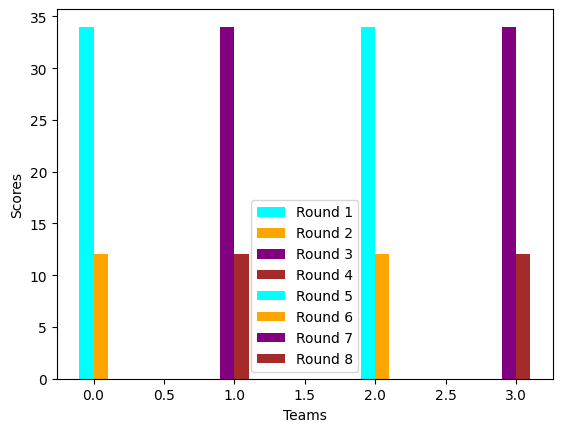

In [31]:
import matplotlib.pyplot as plt 
import numpy as np 
  
# create data 
x = 0 
y1 = [34]
y2 = [12]

x2 = 1 + x
y3 = [34]
y4 = [12]

x3 = 1 + x2
y5 = [34]
y6 = [12]

x4 = 1 + x3
y7 = [34]
y8 = [12]

# x5 = np.arange(1) + x4
# y1 = [34]
# y2 = [12]

# x6 = np.arange(1) + x5
# y1 = [34]
# y2 = [12]

# x7 = np.arange(1) + x6
# y1 = [34]
# y2 = [12]

width = 0.1
  
# plot data in grouped manner of bar type 
plt.bar(x-0.05, y1, width, color='cyan') 
plt.bar(x+0.05, y2, width, color='orange') 

plt.bar(x2-0.05, y3, width, color='purple') 
plt.bar(x2+0.05, y4, width, color='brown') 

plt.bar(x3-0.05, y5, width, color='cyan') 
plt.bar(x3+0.05, y6, width, color='orange') 

plt.bar(x4-0.05, y7, width, color='purple') 
plt.bar(x4+0.05, y8, width, color='brown') 

print(x4)
# plt.bar(x-0.2, y1, width, color='cyan') 
# plt.bar(x, y2, width, color='orange') 

plt.xlabel("Teams") 
plt.ylabel("Scores") 
plt.legend(["Round 1", "Round 2", "Round 3","Round 4", "Round 5", "Round 6","Round 7", "Round 8"]) 
plt.show() 

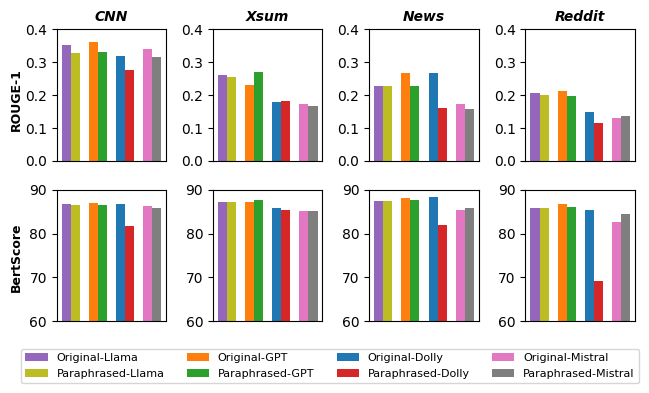

In [14]:
#Bar Plot Code
fig, axs = plt.subplots(2, 4) #,sharey=True)
fig.set_figheight(3.5)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')

#Rouge1

x_labels=['Original-Llama', 'Paraphrased-Llama', 'Original-GPT', 'Paraphrased-GPT', 'Original-Dolly', 'Paraphrased-Dolly', 'Original-Mistral', 'Paraphrased-Mistral']
width=0.25
x=[0.25,0.5,1,1.25,1.75,2,2.5,2.75]

with open('rouge1-cnn.pkl', 'rb') as f:
    values=pkl.load(f)
    

axs[0,0].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,0].set_ylim(0,0.4)
axs[0,0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[0,0].get_xaxis().set_ticks([])

with open('rouge1-xsum.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[0,1].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,1].set_ylim(0,0.4)
axs[0,1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[0,1].get_xaxis().set_ticks([])

with open('rouge1-news.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[0,2].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,2].set_ylim(0,0.4)
axs[0,2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[0,2].get_xaxis().set_ticks([])

with open('rouge1-reddit.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[0,3].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,3].set_ylim(0,0.4)
axs[0,3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[0,3].get_xaxis().set_ticks([])

#BertScore

values=[]

values.append(data_llama_cnn_csv['bertscore'].iloc[0])
values.append(p_data_llama_cnn_csv['bertscore'].iloc[0])
values.append(data_gpt_cnn_csv['bertscore'].iloc[0])
values.append(p_data_gpt_cnn_csv['bertscore'].iloc[0])
values.append(data_dolly_cnn_csv['bertscore'].iloc[0])
values.append(p_data_dolly_cnn_csv['bertscore'].iloc[0])
values.append(data_mistral_cnn_csv['bertscore'].iloc[0])
values.append(p_data_mistral_cnn_csv['bertscore'].iloc[0])
axs[1,0].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=0.25)
axs[1,0].set_ylim(60,90)
#axs[1,0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[1,0].get_xaxis().set_ticks([])


values=[]

values.append(data_llama_xsum_csv['bertscore'].iloc[0])
values.append(p_data_llama_xsum_csv['bertscore'].iloc[0])
values.append(data_gpt_xsum_csv['bertscore'].iloc[0])
values.append(p_data_gpt_xsum_csv['bertscore'].iloc[0])
values.append(data_dolly_xsum_csv['bertscore'].iloc[0])
values.append(p_data_dolly_xsum_csv['bertscore'].iloc[0])
values.append(data_mistral_xsum_csv['bertscore'].iloc[0])
values.append(p_data_mistral_xsum_csv['bertscore'].iloc[0])
axs[1,1].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=0.25)
axs[1,1].set_ylim(60,90)
#axs[1,1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[1,1].get_xaxis().set_ticks([])


values=[]
values.append(data_llama_news_csv['bertscore'].iloc[0])
values.append(p_data_llama_news_csv['bertscore'].iloc[0])
values.append(data_gpt_news_csv['bertscore'].iloc[0])
values.append(p_data_gpt_news_csv['bertscore'].iloc[0])
values.append(data_dolly_news_csv['bertscore'].iloc[0])
values.append(p_data_dolly_news_csv['bertscore'].iloc[0])
values.append(data_mistral_news_csv['bertscore'].iloc[0])
values.append(p_data_mistral_news_csv['bertscore'].iloc[0])
axs[1,2].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=0.25)
axs[1,2].set_ylim(60,90)
#axs[1,2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[1,2].get_xaxis().set_ticks([])

values=[]
values.append(data_llama_reddit_csv['bertscore'].iloc[0])
values.append(p_data_llama_reddit_csv['bertscore'].iloc[0])
values.append(data_gpt_reddit_csv['bertscore'].iloc[0])
values.append(p_data_gpt_reddit_csv['bertscore'].iloc[0])
values.append(data_dolly_reddit_csv['bertscore'].iloc[0])
values.append(p_data_dolly_reddit_csv['bertscore'].iloc[0])
values.append(data_mistral_reddit_csv['bertscore'].iloc[0])
values.append(p_data_mistral_reddit_csv['bertscore'].iloc[0])

axs[1,3].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:grey'],label=x_labels,width=0.25)
axs[1,3].set_ylim(60,90)
#axs[1,3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[1,3].get_xaxis().set_ticks([])


handles, labels = axs[1,3].get_legend_handles_labels()

fig.text(0, 0.70, 'ROUGE-1', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.text(0, 0.25, 'BertScore', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.legend(handles, labels,ncol=4, loc = 'lower center',bbox_to_anchor=(0, -0.125, 1, 1), bbox_transform=plt.gcf().transFigure, fontsize=8)
fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)

plt.savefig('../figures/final/Rouge1-BertScore.png',bbox_inches='tight',dpi=400)
plt.show()

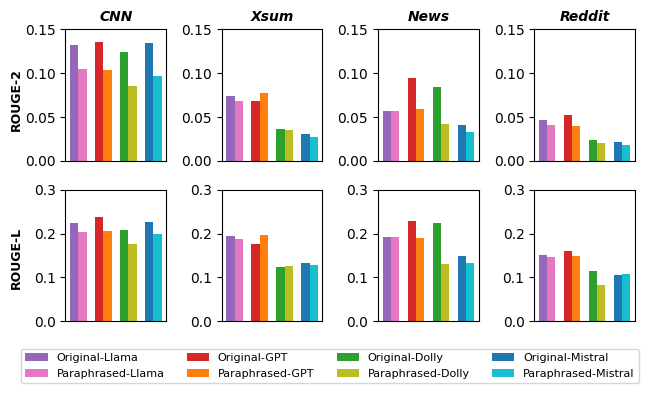

In [7]:
#Bar Plot Code
fig, axs = plt.subplots(2, 4) #,sharey=True)
fig.set_figheight(3.5)
#fig.suptitle('Comparing Position Bias in Gold vs Generated Samples across different Models and Datasets')

#Rouge2
x_labels=['Original-Llama', 'Paraphrased-Llama', 'Original-GPT', 'Paraphrased-GPT', 'Original-Dolly', 'Paraphrased-Dolly', 'Original-Mistral', 'Paraphrased-Mistral']
width=0.25
x=[0.25,0.5,1,1.25,1.75,2,2.5,2.75]

with open('rouge2-cnn.pkl', 'rb') as f:
    values=pkl.load(f)
    

axs[0,0].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,0].set_ylim(0,0.15)
axs[0,0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[0,0].get_xaxis().set_ticks([])

with open('rouge2-xsum.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[0,1].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,1].set_ylim(0,0.15)
axs[0,1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[0,1].get_xaxis().set_ticks([])

with open('rouge2-news.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[0,2].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,2].set_ylim(0,0.15)
axs[0,2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[0,2].get_xaxis().set_ticks([])

with open('rouge2-reddit.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[0,3].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[0,3].set_ylim(0,0.15)
axs[0,3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[0,3].get_xaxis().set_ticks([])

#RougeL



with open('rougeL-cnn.pkl', 'rb') as f:
    values=pkl.load(f)
    

axs[1,0].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[1,0].set_ylim(0,0.3)
#axs[1,0].set_title('CNN',fontsize = 10,weight='bold',style='italic')
axs[1,0].get_xaxis().set_ticks([])

with open('rougeL-xsum.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[1,1].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[1,1].set_ylim(0,0.3)
#axs[1,1].set_title('Xsum',fontsize = 10,weight='bold',style='italic')
axs[1,1].get_xaxis().set_ticks([])

with open('rougeL-news.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[1,2].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[1,2].set_ylim(0,0.3)
#axs[1,2].set_title('News',fontsize = 10,weight='bold',style='italic')
axs[1,2].get_xaxis().set_ticks([])

with open('rougeL-reddit.pkl', 'rb') as f:
    values=pkl.load(f)

    
axs[1,3].bar(x,values,color=['tab:purple', 'tab:pink','tab:red','tab:orange','tab:green','tab:olive','tab:blue','tab:cyan'],label=x_labels,width=width)
axs[1,3].set_ylim(0,0.3)
#axs[1,3].set_title('Reddit',fontsize = 10,weight='bold',style='italic')
axs[1,3].get_xaxis().set_ticks([])




handles, labels = axs[1,3].get_legend_handles_labels()

fig.text(0, 0.70, 'ROUGE-2', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.text(0, 0.25, 'ROUGE-L', va='center', rotation='vertical', weight='bold',fontsize=9)
fig.legend(handles, labels,ncol=4, loc = 'lower center',bbox_to_anchor=(0, -0.125, 1, 1), bbox_transform=plt.gcf().transFigure, fontsize=8)
fig.tight_layout()
# plt.gcf().text(0.02, 0.55, textstr, fontsize=14)

plt.savefig('../figures/final/Rouge2-RougeL.png',bbox_inches='tight',dpi=400)
plt.show()